## Exploratory Data Analysis on weather 
<img src= "https://i.postimg.cc/N03y5WwR/Chat-GPT-Image-Aug-11-2025-12-41-43-PM.png" width="1000" height="600"><br>
## Dataset overview
This weather dataset is a detailed record of hourly weather observations from January 1, 2012 to September 9, 2012. It contains information such as the temperature, how cold or warm it felt (dew point), the humidity in the air, wind speed, how far you could see (visibility), and the air pressure. It also describes the actual weather conditions in words, like “fog,” “clear,” “cloudy,” or “freezing drizzle.” The data is complete with no missing entries, meaning every hour in this period has a recorded weather report. Overall, it gives a clear picture of how the weather changed hour by hour, making it useful for studying patterns, spotting trends, or even predicting future weather.

### Data preprocessing

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [41]:
df = pd.read_csv("Project 1 - Weather Dataset.csv")

In [42]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [43]:
df = df.drop_duplicates()

In [44]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [45]:
df['weather'] = df['weather'].str.strip()

In [46]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

In [47]:
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])

In [48]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('weather_encoded')
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [49]:
df = df.reset_index(drop=True)

In [50]:
df.to_csv("weather_preprocessed.csv", index=False)

In [51]:
df.head()

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather,weather_encoded
0,2012-01-01 00:00:00,0.381883,0.465028,0.829268,0.048193,0.162162,0.606852,Fog,7
1,2012-01-01 01:00:00,0.381883,0.468809,0.841463,0.048193,0.162162,0.606852,Fog,7
2,2012-01-01 02:00:00,0.381883,0.474480,0.865854,0.084337,0.079002,0.610114,"Freezing Drizzle,Fog",9
3,2012-01-01 03:00:00,0.387211,0.478261,0.853659,0.072289,0.079002,0.611746,"Freezing Drizzle,Fog",9
4,2012-01-01 04:00:00,0.387211,0.476371,0.853659,0.084337,0.095634,0.605220,Fog,7


In [52]:
df.tail()

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather,weather_encoded
8779,2012-12-31 19:00:00,0.415631,0.487713,0.768293,0.361446,0.197505,0.425775,Snow,35
8780,2012-12-31 20:00:00,0.417407,0.493384,0.792683,0.289157,0.197505,0.409462,Snow,35
8781,2012-12-31 21:00:00,0.404973,0.510397,0.914634,0.337349,0.095634,0.396411,Snow,35
8782,2012-12-31 22:00:00,0.410302,0.504726,0.865854,0.337349,0.197505,0.389886,Snow,35
8783,2012-12-31 23:00:00,0.413854,0.499055,0.829268,0.361446,0.230769,0.386623,Snow,35


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date/time         8784 non-null   datetime64[ns]
 1   temp_c            8784 non-null   float64       
 2   dew_point_temp_c  8784 non-null   float64       
 3   rel_hum_%         8784 non-null   float64       
 4   wind_speed_km/h   8784 non-null   float64       
 5   visibility_km     8784 non-null   float64       
 6   press_kpa         8784 non-null   float64       
 7   weather           8784 non-null   object        
 8   weather_encoded   8784 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 617.8+ KB


In [54]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

In [55]:
df.shape

(8784, 9)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date/time         8784 non-null   datetime64[ns]
 1   temp_c            8784 non-null   float64       
 2   dew_point_temp_c  8784 non-null   float64       
 3   rel_hum_%         8784 non-null   float64       
 4   wind_speed_km/h   8784 non-null   float64       
 5   visibility_km     8784 non-null   float64       
 6   press_kpa         8784 non-null   float64       
 7   weather           8784 non-null   object        
 8   weather_encoded   8784 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 617.8+ KB


## Data visualization

##### 1. Temperature Over Time

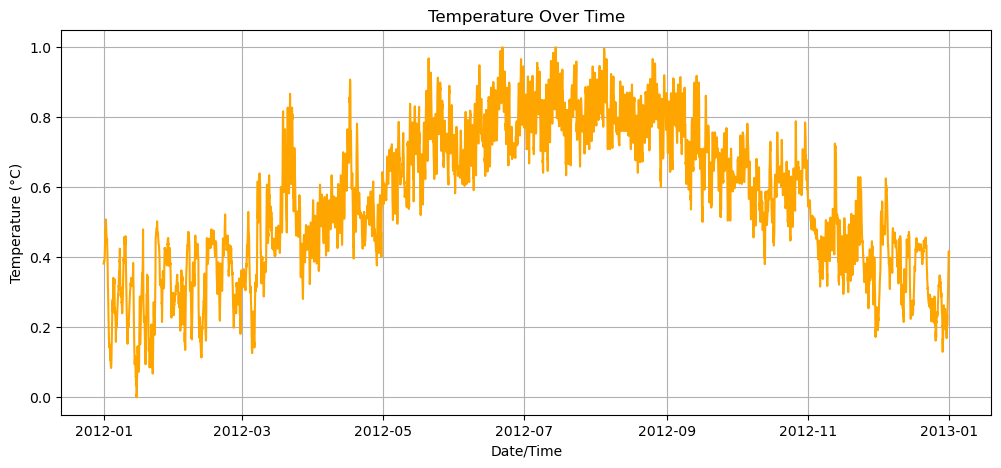

In [57]:
plt.figure(figsize=(12, 5))
plt.plot(df['date/time'], df['temp_c'], color='orange')
plt.title('Temperature Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

#### 2. Weather Condition Distribution

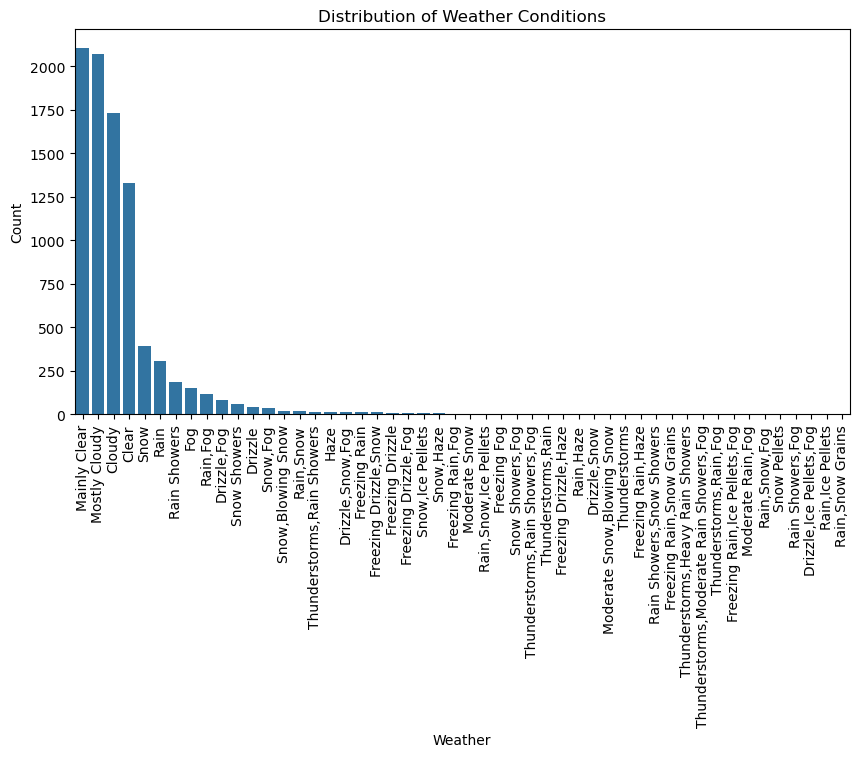

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

#### 3. Correlation Heatmap

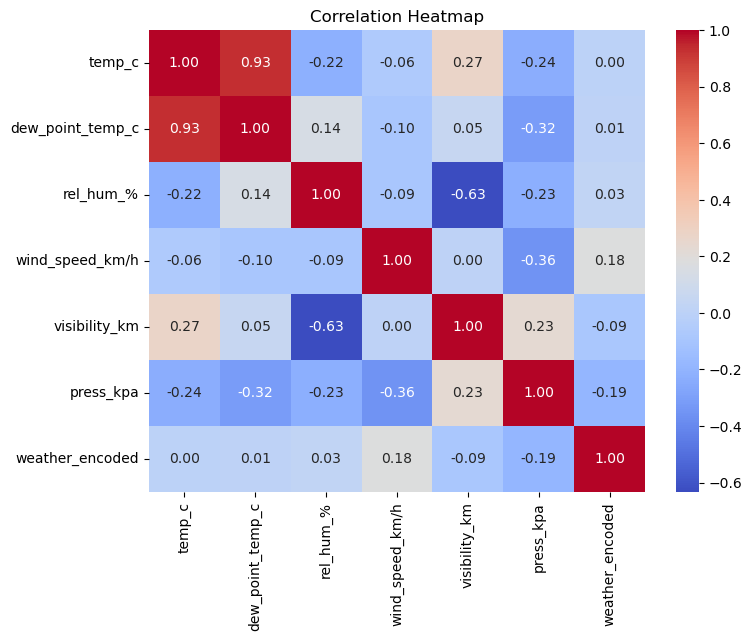

In [59]:
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### 4. Wind Speed vs Visibility

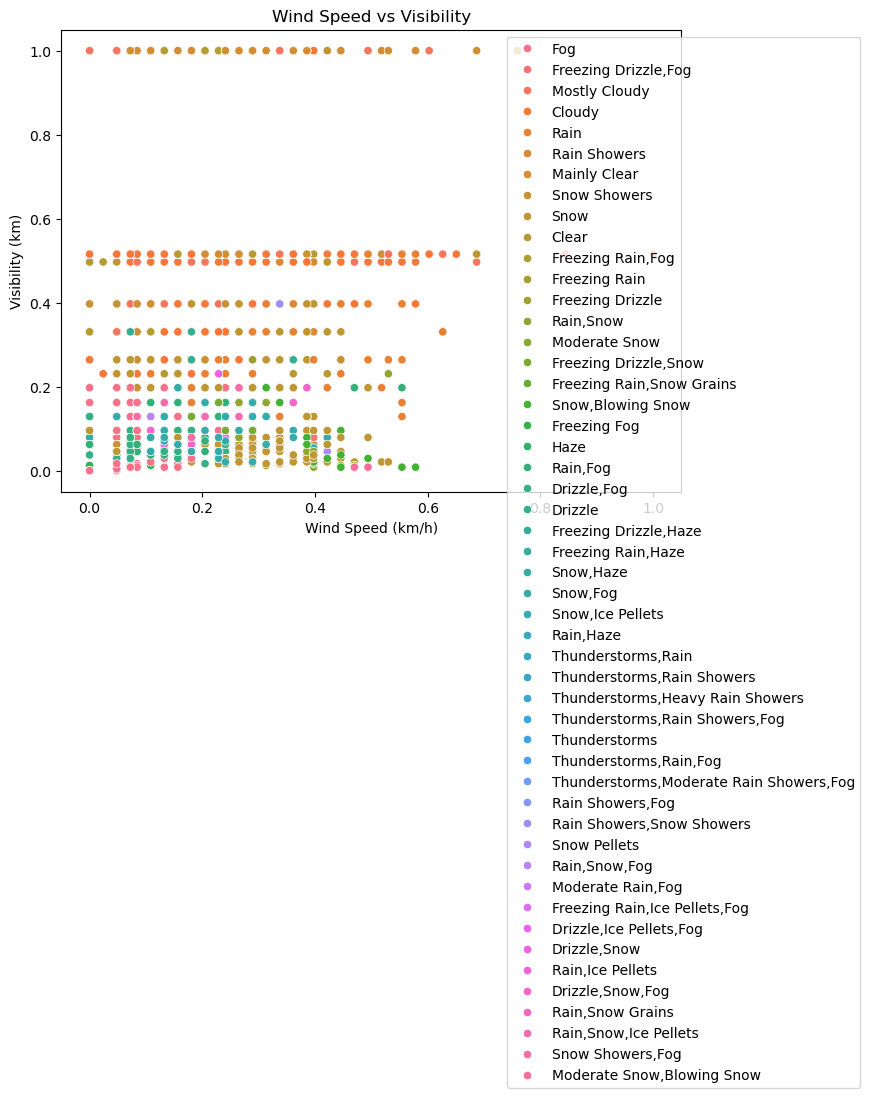

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='wind_speed_km/h', y='visibility_km', hue='weather')
plt.title('Wind Speed vs Visibility')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Visibility (km)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

#### 5. Monthly Temperature Trend

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_11528\3385202709.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='temp_c', ci=None, marker='o')


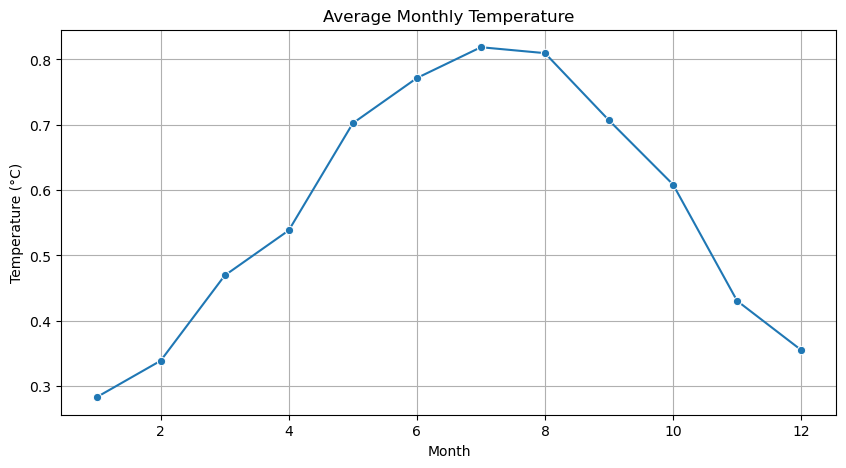

In [61]:
df['month'] = df['date/time'].dt.month
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='month', y='temp_c', ci=None, marker='o')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

#### 6. Temperature vs Relative Humidity

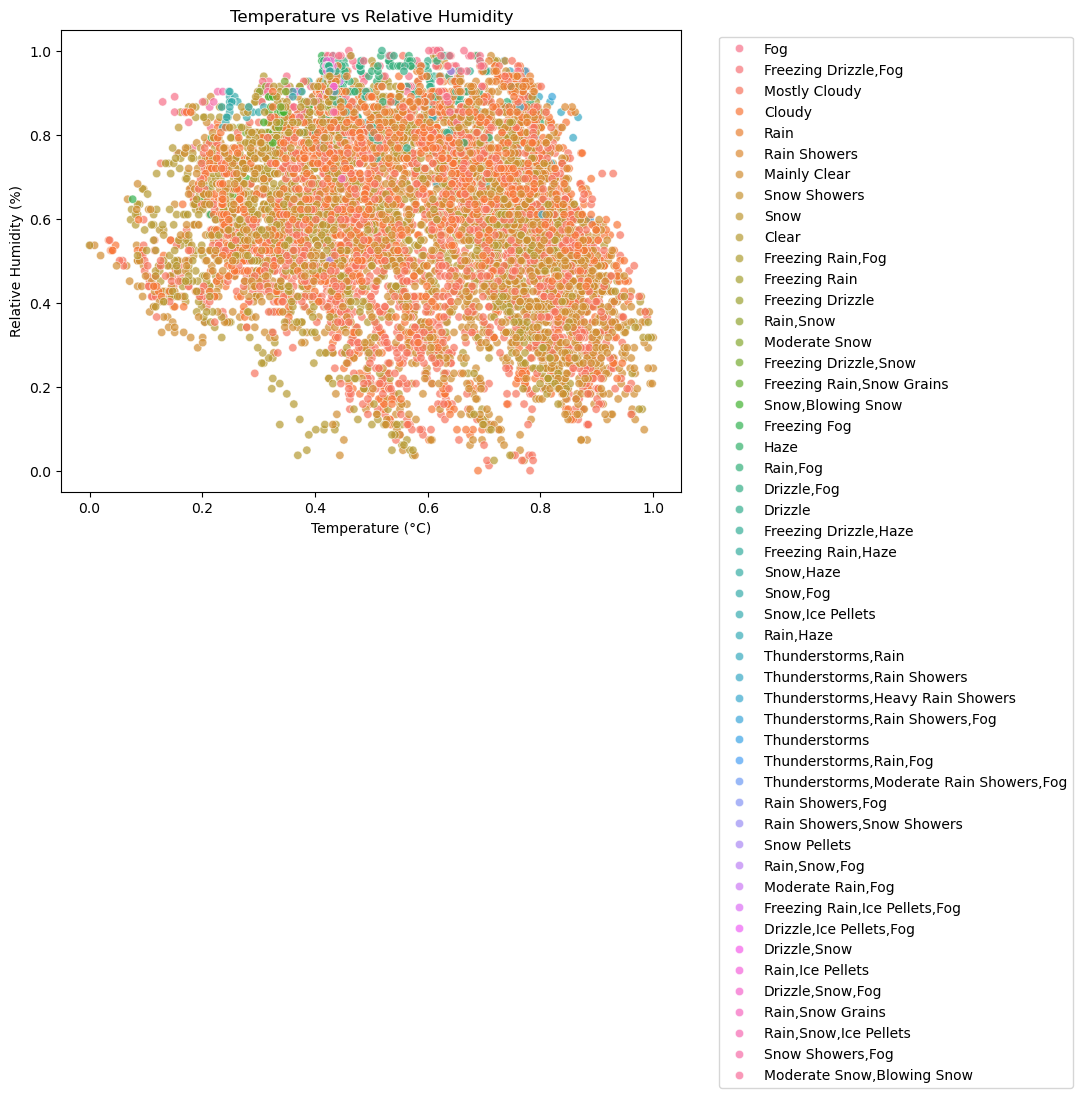

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='temp_c', y='rel_hum_%', hue='weather', alpha=0.7)
plt.title('Temperature vs Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 7. Pressure over Time

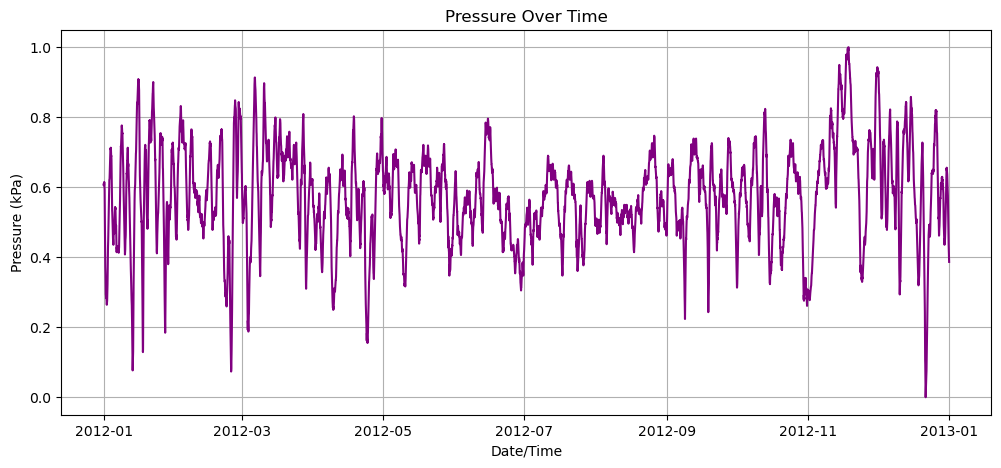

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(df['date/time'], df['press_kpa'], color='purple')
plt.title('Pressure Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Pressure (kPa)')
plt.grid(True)
plt.show()

#### 8. Visibility Distribution

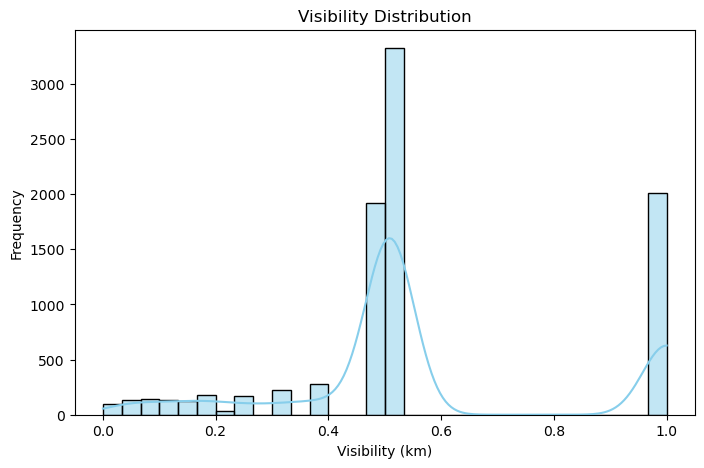

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(df['visibility_km'], bins=30, kde=True, color='skyblue')
plt.title('Visibility Distribution')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.show()

#### 9. Boxplot of Temperature by Weather Type

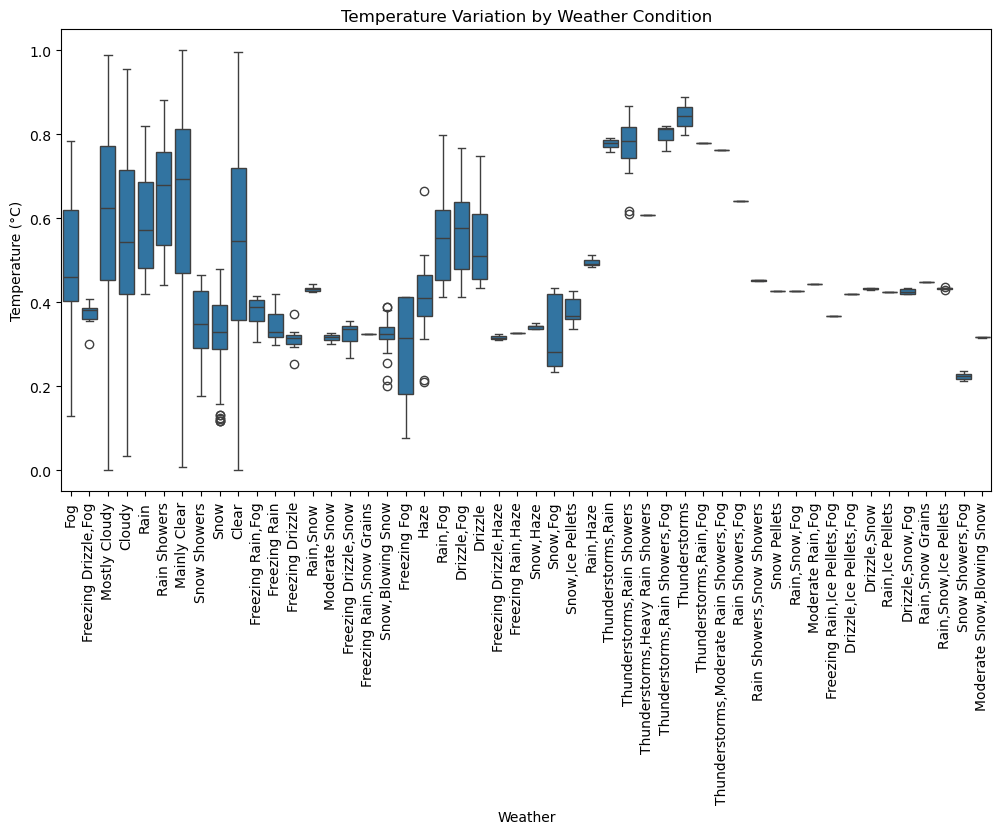

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='weather', y='temp_c')
plt.xticks(rotation=90)
plt.title('Temperature Variation by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Temperature (°C)')
plt.show()

#### 10. Hourly Temperature Trend

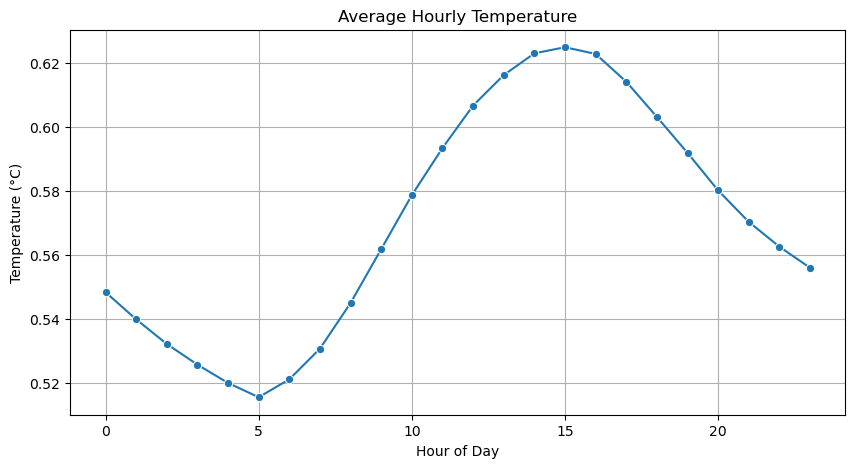

In [66]:
df['hour'] = df['date/time'].dt.hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby('hour')['temp_c'].mean().reset_index(),
             x='hour', y='temp_c', marker='o')
plt.title('Average Hourly Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

#### 11. Heatmap of Temperature by Month & Hour

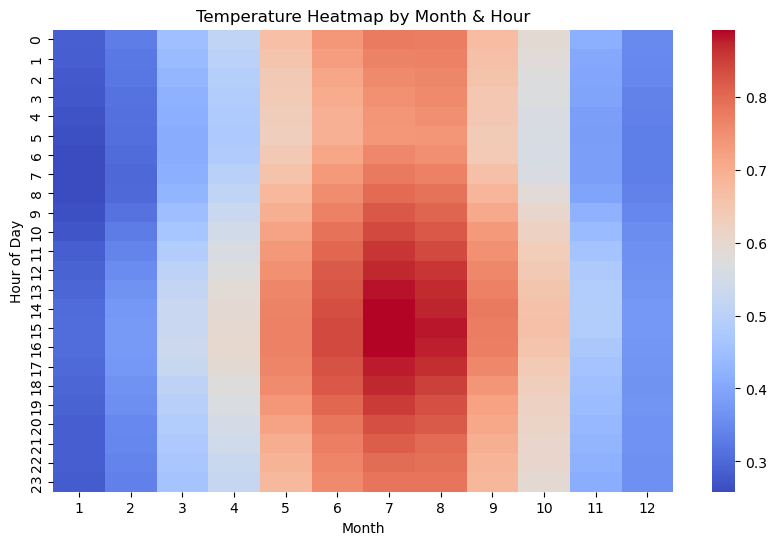

In [67]:
df['month'] = df['date/time'].dt.month
pivot_data = df.pivot_table(values='temp_c', index='hour', columns='month', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=False)
plt.title('Temperature Heatmap by Month & Hour')
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.show()

### Summary

The weather dataset contains hourly records with details on temperature, humidity, wind speed, visibility, pressure, and weather conditions.
Temperatures vary seasonally, with colder periods linked to higher humidity and lower visibility.
Humidity tends to be highest during fog, rain, or snow events.
Wind speed generally improves visibility except during storms.
Pressure drops often precede precipitation, while higher pressure is linked to clear weather.
The most frequent conditions are Clear, Fog, and Rain Showers.

### Future work

* Implement real-time weather monitoring by integrating live data from APIs. 
* Use machine learning models to predict temperature, humidity, and precipitation trends.
* Develop a weather alert system for extreme conditions like storms, floods, or heatwaves.
* Expand the dataset to include satellite imagery for better cloud and precipitation analysis.
* Build an interactive dashboard for visualizing past, present, and predicted weather conditions.
* Incorporate climate change analysis to study long-term patterns and anomalies.

### References

* Medium: https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
* Kaggle: https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis
* kaggle: https://www.kaggle.com/datasets/rohitgrewal/weather-data